In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
altair                       5.4.1
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        24.2.0
blinker                      1.8.2
cachetools                   5.5.0
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.4.0
click                        8.1.7
cloudpickle                  3.1.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cryptography                 43.0.3
cycler                       0.12.1
debugpy                      1.8.7
decorator                    5.1.1
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.54.1
future                       1.0.0
gast                         0.6.0
gensim                       4.3.3
gitdb                        4.0.11



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os, sys
# Append the parent directory to the system path
sys.path.append(os.path.abspath('..'))

import tensorflow as tf
from tensorflow import keras
from keras import layers

from src.preprocessing.data_preprocessing import ResumeTextPreprocessor, NLPPreprocessor
from src.training.training import call_data, create_and_compile_model
from src.model.model import TextAnalysisModel2, TextClassifier

from src.utils.helpers import plot_accuracy

Cleaning text data...
Found potentially problematic words:
Problem word: ntp
Problem word: ntp
Found potentially problematic words:
Problem word: npc
Found potentially problematic words:
Problem word: nac
Problem word: nac
Tokenizing text...
Splitting data...


c:\Projs\COde\ResAnalysis\resanalysis\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [2]:
data = call_data()
data

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\..."
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,..."
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...


In [3]:
data

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\..."
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,..."
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...


In [35]:
data['cleaned_text'] = data['Resume'].apply(ResumeTextPreprocessor().process_and_check)

max_words=10000
max_length=500
embedding_dim=100

import pandas as pd
import numpy as np
import re
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

class AdvancedTextPreprocessor:
    def __init__(self, language='english'):
        """
        Advanced text preprocessor with multiple cleaning techniques
        
        Args:
            language (str): Language for stopwords and processing
        """
        self.stop_words = set(stopwords.words(language))
        self.lemmatizer = WordNetLemmatizer()
    
    def clean_text(self, text):
        """
        Comprehensive text cleaning method
        
        Args:
            text (str): Input text to clean
        
        Returns:
            str: Cleaned and preprocessed text
        """
        # Convert to lowercase
        text = text.lower()
        
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords and lemmatize
        cleaned_tokens = [
            self.lemmatizer.lemmatize(token) 
            for token in tokens 
            if token not in self.stop_words and len(token) > 2
        ]
        
        return ' '.join(cleaned_tokens)
    
    def preprocess_dataset(self, X):
        """
        Apply text preprocessing to entire dataset
        
        Args:
            X (array-like): Input text data
        
        Returns:
            list: Preprocessed text data
        """
        return [self.clean_text(text) for text in X]


Found potentially problematic words:
Problem word: ntp
Problem word: ntp
Found potentially problematic words:
Problem word: npc
Found potentially problematic words:
Problem word: nac
Problem word: nac


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [88]:
def advanced_text_classification_pipeline(feat_col: str, tar_col: str, csv_path, max_words=5000, max_len=250):
    """
    Advanced text classification pipeline with enhanced preprocessing
    
    Args:
        csv_path (str): Path to CSV file
        test_size (float): Proportion of data for testing
        max_words (int): Maximum number of words in vocabulary
        max_len (int): Maximum sequence length
    
    Returns:
        Tuple of model, tokenizer, label encoder, and preprocessor
    """
    
    if isinstance(csv_path, pd.DataFrame):
        # Load data
        df = csv_path
    else:
        # Load data
        df = pd.read_csv(csv_path)

    X = df[feat_col].values
    y = df[tar_col].values
    
    # Advanced Text Preprocessing
    preprocessor = AdvancedTextPreprocessor()
    X_cleaned = preprocessor.preprocess_dataset(X)
    
    # Encode Labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_categorical = to_categorical(y_encoded)
    num_classes = y_categorical.shape[1]
    
    # Tokenization
    tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
    tokenizer.fit_on_texts(X_cleaned)
    X_sequences = tokenizer.texts_to_sequences(X_cleaned)
    X_padded = pad_sequences(X_sequences, maxlen=max_len, truncating='post', padding='post')

    return X_padded, y_categorical, num_classes, tokenizer, label_encoder


def scaling(X, Y, test_size=0.2):    
    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, 
        test_size=test_size, 
        random_state=42
    )

    return X_train, X_test, y_train, y_test
    

In [89]:
X_pad, y_pad, num_classes, tokenizer, label_encoder = advanced_text_classification_pipeline(csv_path=data, feat_col='Resume', tar_col='Category', max_len=max_length, max_words=max_words)

In [90]:
X_train, X_test, y_train, y_test = scaling(X_pad, y_pad)
X_train.shape

(975, 500)

In [104]:
data

,ID,Category,Resume,cleaned_text
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",john smith phone box callahan greatresumesfast...
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...,ame surname address mobile email personal prof...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...,anthony brown assistant area expertise persona...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...,www downloadmela com satheesh email career obj...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...",human resource director expert organizational ...
...,...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\...",free flight attendant resume darlene flint wes...
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...,corporate flight attendant resume caitlin flan...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,...",major conrad preedom fairchild suite usaf acad...
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...,stacy sample cell email com qualification flig...


In [105]:
t = label_encoder.transform(data['Category'][-1:])
tT = to_categorical(t)
tT

array(['Accountant'], dtype=object)

In [107]:
label_encoder.inverse_transform([np.argmax(y_test[-1])])

array(['Designing'], dtype=object)

In [133]:
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])
original_text = ' '.join([reverse_word_index.get(i, '?') for i in X_train[-1]])
original_text = original_text.replace('<OOV>', '')
original_text = original_text.replace('?', '')
original_text = original_text.rstrip()
original_text = original_text.lstrip()
original_text


'street red fort old  mail    position assistant bank manager utilize skill knowledge experience  xefxxb seven year experience assistant branch manager various international domestic  excellent presentation interpersonal  xefxxb instrumental opening two hundred new saving  xefxxb extensive knowledge rapport  xefxxb possess good leadership   international bank new jersey    xefxxb handling procedure  opening saving accountsnxefxxb increasing business networking building new client  xefxxb assisting manager identifying sale opportunity  xefxxb updating daily report  xefxxb training overseeing performance  xefxxb planning implementing strategy increase customer  ensuring  stock order per norm   new jersey  banking analyst  conducted presented industry research reportsnxefxxb participated equity structuring  performed task financial analysisnxefxxb built utilized effective financial  conducted research credit debt capital  united banking organization new jersey nyn  banking analystnxefxxb 

In [139]:
# Build Advanced Model with More Complexity
model = tf.keras.Sequential([
    # Embedding layer with more dimensions
    tf.keras.layers.Embedding(max_words, 64, input_length=max_length),
    
    # Bidirectional LSTM for capturing context
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(128, return_sequences=True)
    ),
    tf.keras.layers.GlobalMaxPooling1D(),
    
    # More dense layers with regularization
    tf.keras.layers.Dense(128, activation='relu', 
                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(64, activation='relu', 
                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    # Output layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile with learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.9,
    staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping and Model Checkpointing
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras', 
    save_best_only=True, 
    monitor='val_accuracy'
)

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/200


c:\Projs\COde\ResAnalysis\resanalysis\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 887ms/step - accuracy: 0.0664 - loss: 4.1110 - val_accuracy: 0.0718 - val_loss: 3.4468
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 774ms/step - accuracy: 0.1430 - loss: 3.4734 - val_accuracy: 0.0564 - val_loss: 3.4275
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 783ms/step - accuracy: 0.2506 - loss: 2.9483 - val_accuracy: 0.0564 - val_loss: 3.4101
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 789ms/step - accuracy: 0.3707 - loss: 2.5287 - val_accuracy: 0.0821 - val_loss: 3.3944
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 820ms/step - accuracy: 0.4831 - loss: 2.0881 - val_accuracy: 0.0872 - val_loss: 3.3786
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 837ms/step - accuracy: 0.5275 - loss: 1.9074 - val_accuracy: 0.1026 - val_loss: 3.3650
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 821ms/step - accuracy: 0.5948 - loss: 1.6073 - val_accuracy: 0.1333 - val_loss: 3.3525
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 841ms/step - accuracy: 0.6789 - loss: 1.4563 - val_accuracy

In [30]:
inputs = keras.Input(shape=(None,))

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = layers.Embedding(max_words, embedding_dim)(inputs)
x = layers.Dropout(0.5)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
epochs = 10

model.fit(data2['X_train'], data2['y_train'], validation_data=(data2['X_val'], data2['y_val']), epochs=epochs)

Epoch 1/10


c:\Projs\COde\ResAnalysis\resanalysis\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.0516 - loss: 0.0000e+00 - val_accuracy: 0.0513 - val_loss: 0.0000e+00
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0527 - loss: 0.0000e+00 - val_accuracy: 0.0513 - val_loss: 0.0000e+00
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0529 - loss: 0.0000e+00 - val_accuracy: 0.0513 - val_loss: 0.0000e+00
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0515 - loss: 0.0000e+00 - val_accuracy: 0.0513 - val_loss: 0.0000e+00
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0546 - loss: 0.0000e+00 - val_accuracy: 0.0513 - val_loss: 0.0000e+00
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0468 - loss: 0.0000e+00 - val_accuracy: 0.0513 - val_loss: 0.0000e+00
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0509 - loss: 0.0000e+00 - val_accuracy: 0.0513 - val_loss: 0.0000e+00
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0

In [141]:
def predict_category(text, model, tokenizer, label_encoder, preprocessor, max_len=250):
    """
    Predict category for a new text
    
    Args:
        text (str): Input text to classify
        model (tf.keras.Model): Trained model
        tokenizer (Tokenizer): Fitted tokenizer
        label_encoder (LabelEncoder): Fitted label encoder
        preprocessor (AdvancedTextPreprocessor): Text preprocessor
        max_len (int): Maximum sequence length
    
    Returns:
        str: Predicted category
    """
    # Preprocess text
    cleaned_text = preprocessor.clean_text(text)
    
    # Tokenize and pad
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, truncating='post', padding='post')
    
    # Predict
    prediction = model.predict(padded_sequence)
    predicted_class_index = np.argmax(prediction)
    
    # Get original label
    predicted_category = label_encoder.inverse_transform([predicted_class_index])[0]
    
    return predicted_category

In [113]:
X_test[-1]

array([   1,    1,    1,    1,    1,    1,    1,  550,    1, 6877,  252,
         34, 5848,  459,  488,    1,    1,    1, 2854,  994,    3,    1,
          1, 5848,    1,    3, 8370, 8440, 5848,  459,    1, 4321,    1,
        115, 3075,  194, 2855, 1942,    1,  894, 3075, 2733,   14,    1,
       3075, 2733, 3643,    1, 5848, 2733, 4321, 3786, 1669,    1, 1525,
          1,  540,    1, 4321,    1,  222,  142, 1768,    1,    1,    1,
         33,   10,    1, 3075,  149,  110, 3628,    1,  359,    1, 2097,
       5848,   20,    1,   16, 1038,  306,    1,    1, 4321, 2733,    1,
       4321,    1,  581,  667,    1, 1388,    1,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [142]:
predict_category(data['Resume'][-1:].values, model, tokenizer, label_encoder, max_length)

AttributeError: 'int' object has no attribute 'clean_text'

In [147]:
label_encoder.inverse_transform([np.argmax(X_test[0])])

array(['BPO'], dtype=object)

In [136]:
X_test[1]

array([   1, 7121,  340, 1806, 3189,    1,    1,    1,    1,    1, 7121,
        340, 1806, 3189,    1, 7121,  340, 1806, 3189,    1,    1,    1,
          1,    1, 8913,    1,    1,  332,    1, 8913, 8913, 8913, 8913,
       8913,    1,    1,    1, 7121,  340, 1806, 3189,    1,   49,  421,
          1,   48,    1,   49,  421,    1,    1,    1,    4,    1,    1,
         63,    1,    1,    1,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [148]:
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])
original_text = ' '.join([reverse_word_index.get(i, '?') for i in X_test[0]])
original_text = original_text.replace('<OOV>', '')
original_text = original_text.replace('?', '')
original_text = original_text.rstrip()
original_text = original_text.lstrip()
original_text


'healthcare nurse resume   south  crest xexxa   xexxa cell xexxa email    health   mental health nurse decade  experience providing  care acute  well planned implemented professional nursing care  accordance hospital policy regulation  job function executed nursing process based  experience coordinated provided safe patient care  awareness age appropriate culturally aware  responded patient message query related  problem routine report concern  behavior  issue fall within nursing scope addition  knowledge modern psychiatric nursing theory  procedure well problem mental illness    counseling   supervision   maintenance   health   health  healthcare company xexx atlanta july xexx mar nxexxa administered oral  medication oversaw dispensing   medication  kept accurate written record patient care provided including  treatment plan progress note medication administered  planningnxexxa educated patient family member patientxexxs  medication daily living skillsnxexxa observed assessed change t

In [149]:
 # Predict
prediction = model.predict(X_test[0].reshape(1, -1))
predicted_class_index = np.argmax(prediction)
# predicted_class_index
# # Get original label
predicted_category = label_encoder.inverse_transform([predicted_class_index])[0]
predicted_category

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


'Health & Fitness'

In [ ]:
predict_category()

In [27]:
data2['y_train']

array([14, 15, 15, 16, 16, 24, 23, 14, 21, 15,  1, 11, 15,  5,  0, 21, 20,
       16, 10, 16,  4, 16,  7, 21, 15, 11, 21, 22, 15,  9,  9, 19, 14, 22,
       22,  5,  0,  5, 15, 16, 21,  1,  9,  9, 19, 17, 21, 13, 11,  9, 22,
        9, 21, 19,  2, 13, 15, 13, 19, 14,  0,  9, 23, 14,  0, 11, 13,  2,
        9, 22, 20, 20, 15, 17, 19,  4, 21, 15,  0, 23, 19,  9, 16, 17, 17,
       20, 18,  5, 15, 16, 21, 16, 14, 22,  6, 21, 23, 17, 20, 15, 12, 19,
       21, 16, 16, 16, 18, 22, 18, 24, 20, 24, 21, 16, 21, 24, 11, 15, 11,
       10, 17, 16, 21,  1, 16, 17, 15, 17,  5, 24, 17, 15, 13, 13,  0, 16,
        1, 15, 15,  1,  1, 16, 18, 17, 15, 15, 16, 20, 11, 20, 16,  1,  0,
        7, 12, 15, 15,  5, 21,  0,  1, 24,  9, 24,  6,  3, 21,  9, 12, 20,
        8,  1,  8, 20, 21,  2, 16, 24, 17,  0,  0,  2, 16, 16, 17,  1, 22,
        9, 16,  2, 11,  1,  9, 24, 20,  0,  9,  1,  0, 19, 14, 24, 14, 22,
       14,  0,  5, 12, 24, 11, 15, 16,  9, 11, 15, 17, 12,  9, 14, 16, 10,
       21,  1,  9,  3, 13

In [18]:
# Training setup
def train_model(train_dataset, val_dataset, vocab_size, embed_dim, max_length, num_classes, embedding_matrix=None):
    # Initialize model
    model = TextClassifier(vocab_size, embed_dim, max_length, num_classes, embedding_matrix)
    
    # Learning rate schedule
    initial_learning_rate = 0.001
    decay_steps = 1000
    decay_rate = 0.9
    learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate, decay_steps, decay_rate
    )
    
    # Optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)
    
    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Callbacks
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
        # tf.keras.callbacks.ReduceLROnPlateau(
        #     monitor='val_loss',
        #     factor=0.5,
        #     patience=3,
        #     min_lr=0.00001
        # )
    ]
    
    # Train model
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=30,
        callbacks=callbacks
    )
    
    return model, history

In [19]:
data

,ID,Category,Resume,cleaned_text
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",john smith phone box callahan greatresumesfast...
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...,ame surname address mobile email personal prof...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...,anthony brown assistant area expertise persona...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...,www downloadmela com satheesh email career obj...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...",human resource director expert organizational ...
...,...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\...",free flight attendant resume darlene flint wes...
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...,corporate flight attendant resume caitlin flan...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,...",major conrad preedom fairchild suite usaf acad...
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...,stacy sample cell email com qualification flig...


In [20]:
data['cleaned_text'] = data['Resume'].apply(ResumeTextPreprocessor().process_and_check)

# Using your preprocessor
preprocessor = NLPPreprocessor(max_words=10000, max_length=500, embedding_dim=100)
data2 = preprocessor.prepare_data(
    texts=data['cleaned_text'],
    labels=data['Category'],
    use_word2vec=True  # Use Word2Vec embeddings
)
# data2

if data2['embedding_matrix'] is not None:
        vocab_size = data2['embedding_matrix'].shape[0] 
    

# Train model
model, history = train_model(
    data2['train_dataset'],
    data2['val_dataset'],
    vocab_size=vocab_size,
    embed_dim=100,
    max_length=500,
    num_classes=data2['num_classes'],
    embedding_matrix=data2['embedding_matrix']
)


# # In your create_model function, ensure the embedding layer is initialized correctly
# def create_model(vocab_size, embedding_dim, num_classes, embedding_matrix=None):
#     if embedding_matrix is not None:
#         vocab_size = embedding_matrix.shape[0]  # Use the size of the embedding matrix

    
#     model = TextAnalysisModel2(
#         vocab_size=vocab_size,
#         embed_dim=embedding_dim,
#         max_length=500,  # Default max_length, adjust as needed
#         conv_units=64,
#         dense_units=64,
#         output=num_classes,
#         kernels=3,
#         regularizer=0.01,
#         dropout=0.5,
#         # Ensure the embedding layer is initialized to accept weights
#         embedding_matrix=embedding_matrix
#     )
    
#     if embedding_matrix is not None:
#         model.embedding.trainable = False  # Freeze embedding layer if using Word2Vec
    
#     model.compile(
#         optimizer='adam',
#         loss='sparse_categorical_crossentropy',
#         metrics=['categorical_accuracy']
#     )
    

Found potentially problematic words:
Problem word: ntp
Problem word: ntp
Found potentially problematic words:
Problem word: npc
Found potentially problematic words:
Problem word: nac
Problem word: nac
Analyzing text characteristics...
Average length: 607.49
Median length: 317.00
95th percentile length: 2605.00
Max length: 6149
Total unique words: 32427
Words appearing only once: 12713
Tokenizing texts...
Creating Word2Vec embeddings...
Splitting data...
Creating TF datasets...
Epoch 1/30


c:\Projs\COde\ResAnalysis\resanalysis\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.0536 - loss: 4.1491 - val_accuracy: 0.1538 - val_loss: 3.4101
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1840 - loss: 3.0358 - val_accuracy: 0.1846 - val_loss: 3.2006
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2732 - loss: 2.7229 - val_accuracy: 0.2256 - val_loss: 2.9534
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3097 - loss: 2.4287 - val_accuracy: 0.2256 - val_loss: 2.7831
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4077 - loss: 2.1093 - val_accuracy: 0.2923 - val_loss: 2.4193
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4390 - loss: 1.9806 - val_accuracy: 0.3179 - val_loss: 2.3408
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4717 - loss: 1.8321 - val_accuracy: 0.3538 - val_loss: 2.2046
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5063 - loss: 1.7730 - val_accuracy: 0.3897 - val_loss: 2.

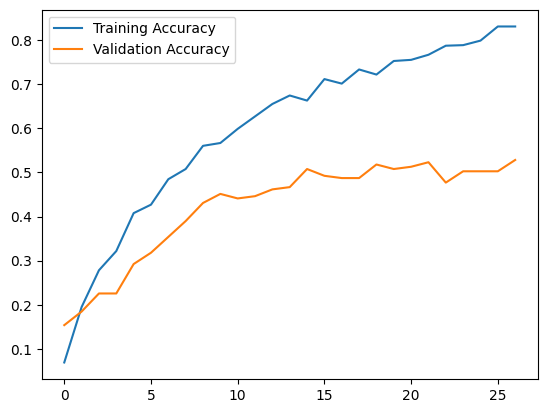

In [21]:
# from src.utils.helpers import plot_accuracy

plot_accuracy(history, 'accuracy', 'val_accuracy')

In [25]:
data2['y_train']

array([14, 15, 15, 16, 16, 24, 23, 14, 21, 15,  1, 11, 15,  5,  0, 21, 20,
       16, 10, 16,  4, 16,  7, 21, 15, 11, 21, 22, 15,  9,  9, 19, 14, 22,
       22,  5,  0,  5, 15, 16, 21,  1,  9,  9, 19, 17, 21, 13, 11,  9, 22,
        9, 21, 19,  2, 13, 15, 13, 19, 14,  0,  9, 23, 14,  0, 11, 13,  2,
        9, 22, 20, 20, 15, 17, 19,  4, 21, 15,  0, 23, 19,  9, 16, 17, 17,
       20, 18,  5, 15, 16, 21, 16, 14, 22,  6, 21, 23, 17, 20, 15, 12, 19,
       21, 16, 16, 16, 18, 22, 18, 24, 20, 24, 21, 16, 21, 24, 11, 15, 11,
       10, 17, 16, 21,  1, 16, 17, 15, 17,  5, 24, 17, 15, 13, 13,  0, 16,
        1, 15, 15,  1,  1, 16, 18, 17, 15, 15, 16, 20, 11, 20, 16,  1,  0,
        7, 12, 15, 15,  5, 21,  0,  1, 24,  9, 24,  6,  3, 21,  9, 12, 20,
        8,  1,  8, 20, 21,  2, 16, 24, 17,  0,  0,  2, 16, 16, 17,  1, 22,
        9, 16,  2, 11,  1,  9, 24, 20,  0,  9,  1,  0, 19, 14, 24, 14, 22,
       14,  0,  5, 12, 24, 11, 15, 16,  9, 11, 15, 17, 12,  9, 14, 16, 10,
       21,  1,  9,  3, 13

In [26]:
import numpy as np

# 3. Balanced Dataset
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(data2['y_train']),
    y=data2['y_train']
)

In [27]:
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 0.7255813953488373,
 1: 0.8,
 2: 2.08,
 3: 3.466666666666667,
 4: 3.9,
 5: 1.1555555555555554,
 6: 1.7333333333333334,
 7: 3.9,
 8: 1.95,
 9: 1.0064516129032257,
 10: 1.6421052631578947,
 11: 1.1142857142857143,
 12: 1.8352941176470587,
 13: 0.9454545454545454,
 14: 0.9176470588235294,
 15: 0.48,
 16: 0.4,
 17: 0.7428571428571429,
 18: 2.2285714285714286,
 19: 1.2,
 20: 0.624,
 21: 0.4727272727272727,
 22: 0.6638297872340425,
 23: 3.9,
 24: 0.8}

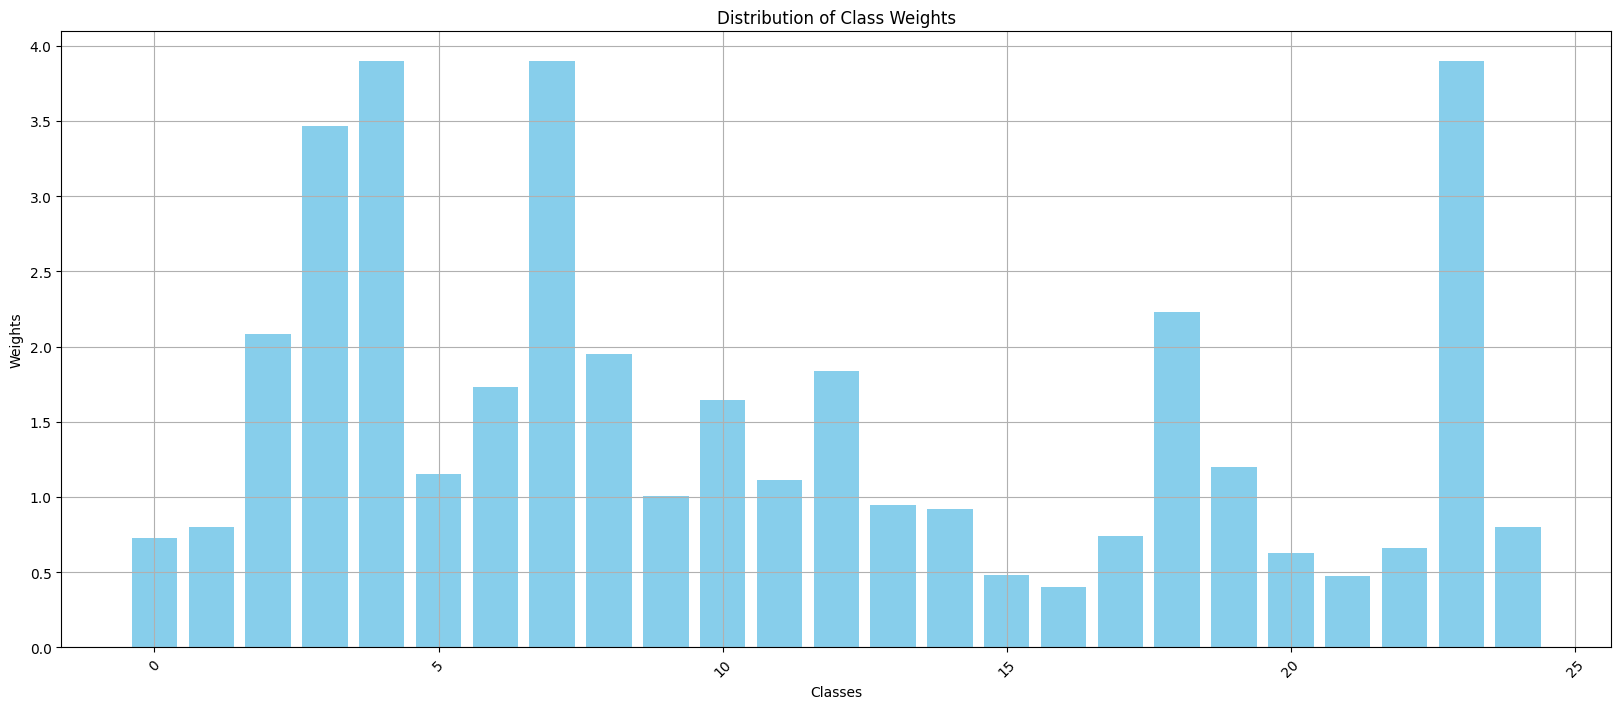

In [32]:
import seaborn as sns

def visualize_class_weights(class_weight_dict):
    import matplotlib.pyplot as plt
    classes = list(class_weight_dict.keys())
    weights = list(class_weight_dict.values())
    plt.figure(figsize=(20, 8))  # Adjusted figure size to accommodate all classes
    plt.bar(classes, weights, color='skyblue')
    plt.title('Distribution of Class Weights')
    plt.xlabel('Classes')
    plt.ylabel('Weights')
    plt.xticks(rotation=45)  # Rotated x-axis labels for better readability
    plt.grid(True)
    plt.show()

visualize_class_weights(class_weight_dict)

---

# Handling Class Imbalance

In [3]:
## PYTORCH IMPLEMENTATION ##

import pandas as pd
import numpy as np
from typing import List, Dict, Union, Tuple
from collections import Counter
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from transformers import AutoTokenizer

class ImbalancedTextDataset(Dataset):
    def __init__(self, 
                 texts: List[str],
                 labels: List[int],
                 tokenizer_name: str = "bert-base-uncased",
                 max_length: int = 512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'label': torch.tensor(label)
        }

class ImbalancedDataHandler:
    def __init__(self, 
                 strategy: str = "weighted",  # "weighted", "oversample", "undersample", "smote"
                 tokenizer_name: str = "bert-base-uncased",
                 max_length: int = 512,
                 batch_size: int = 32):
        self.strategy = strategy
        self.tokenizer_name = tokenizer_name
        self.max_length = max_length
        self.batch_size = batch_size
    
    def get_class_weights(self, labels: List[int]) -> torch.Tensor:
        """Calculate class weights inversely proportional to class frequencies."""
        class_counts = Counter(labels)
        total = len(labels)
        weights = {cls: total / count for cls, count in class_counts.items()}
        
        # Normalize weights
        weight_sum = sum(weights.values())
        weights = {cls: weight / weight_sum for cls, weight in weights.items()}
        
        return torch.tensor([weights[i] for i in range(len(class_counts))])
    
    def get_sample_weights(self, labels: List[int]) -> torch.Tensor:
        """Calculate sample weights based on class frequencies."""
        class_weights = self.get_class_weights(labels)
        return torch.tensor([class_weights[label] for label in labels])
    
    def oversample(self, texts: List[str], labels: List[int]) -> Tuple[List[str], List[int]]:
        """Oversample minority classes to match majority class."""
        df = pd.DataFrame({'text': texts, 'label': labels})
        class_counts = Counter(labels)
        majority_size = max(class_counts.values())
        
        balanced_dfs = []
        for label in class_counts.keys():
            class_df = df[df['label'] == label]
            if len(class_df) < majority_size:
                resampled = resample(class_df,
                                   replace=True,
                                   n_samples=majority_size,
                                   random_state=42)
                balanced_dfs.append(resampled)
            else:
                balanced_dfs.append(class_df)
        
        balanced_df = pd.concat(balanced_dfs)
        return balanced_df['text'].tolist(), balanced_df['label'].tolist()
    
    def undersample(self, texts: List[str], labels: List[int]) -> Tuple[List[str], List[int]]:
        """Undersample majority classes to match minority class."""
        df = pd.DataFrame({'text': texts, 'label': labels})
        class_counts = Counter(labels)
        minority_size = min(class_counts.values())
        
        balanced_dfs = []
        for label in class_counts.keys():
            class_df = df[df['label'] == label]
            if len(class_df) > minority_size:
                resampled = resample(class_df,
                                   replace=False,
                                   n_samples=minority_size,
                                   random_state=42)
                balanced_dfs.append(resampled)
            else:
                balanced_dfs.append(class_df)
        
        balanced_df = pd.concat(balanced_dfs)
        return balanced_df['text'].tolist(), balanced_df['label'].tolist()
    
    def create_dataloader(self, texts: List[str], labels: List[int], shuffle: bool = True) -> DataLoader:
        """Create DataLoader with appropriate sampling strategy."""
        dataset = ImbalancedTextDataset(texts, labels, self.tokenizer_name, self.max_length)
        
        if self.strategy == "weighted":
            # Use WeightedRandomSampler
            sample_weights = self.get_sample_weights(labels)
            sampler = WeightedRandomSampler(
                weights=sample_weights,
                num_samples=len(sample_weights),
                replacement=True
            )
            return DataLoader(dataset, batch_size=self.batch_size, sampler=sampler)
        
        elif self.strategy == "oversample":
            # Oversample minority classes
            balanced_texts, balanced_labels = self.oversample(texts, labels)
            balanced_dataset = ImbalancedTextDataset(
                balanced_texts, 
                balanced_labels,
                self.tokenizer_name,
                self.max_length
            )
            return DataLoader(balanced_dataset, batch_size=self.batch_size, shuffle=shuffle)
        
        elif self.strategy == "undersample":
            # Undersample majority classes
            balanced_texts, balanced_labels = self.undersample(texts, labels)
            balanced_dataset = ImbalancedTextDataset(
                balanced_texts,
                balanced_labels,
                self.tokenizer_name,
                self.max_length
            )
            return DataLoader(balanced_dataset, batch_size=self.batch_size, shuffle=shuffle)
        
        else:
            # No balancing, just return regular DataLoader
            return DataLoader(dataset, batch_size=self.batch_size, shuffle=shuffle)
    
    def get_class_distribution(self, labels: List[int]) -> Dict[int, float]:
        """Calculate class distribution percentages."""
        total = len(labels)
        class_counts = Counter(labels)
        return {label: count/total * 100 for label, count in class_counts.items()}

ModuleNotFoundError: No module named 'torch'

In [4]:
## TENSORFLOW INMPLENTATION

import tensorflow as tf
import numpy as np
import pandas as pd
from typing import List, Dict, Union, Tuple
from collections import Counter
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import AutoTokenizer, TFAutoModel

class TFTextDataset:
    def __init__(self,
                 texts: List[str],
                 labels: List[int],
                 tokenizer_name: str = "bert-base-uncased",
                 max_length: int = 512,
                 batch_size: int = 32):
        self.texts = texts
        self.labels = labels
        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
        self.max_length = max_length
        self.batch_size = batch_size
        
    def encode_texts(self) -> Dict[str, tf.Tensor]:
        """Encode texts using the tokenizer."""
        encodings = self.tokenizer(
            self.texts,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="tf"
        )
        return encodings
    
    def create_dataset(self, shuffle: bool = True) -> tf.data.Dataset:
        """Create TensorFlow dataset."""
        encodings = self.encode_texts()
        labels_tensor = tf.convert_to_tensor(self.labels)
        
        dataset = tf.data.Dataset.from_tensor_slices((
            {
                'input_ids': encodings['input_ids'],
                'attention_mask': encodings['attention_mask']
            },
            labels_tensor
        ))
        
        if shuffle:
            dataset = dataset.shuffle(buffer_size=len(self.texts))
            
        dataset = dataset.batch(self.batch_size)
        return dataset

class TFImbalancedDataHandler:
    def __init__(self,
                 strategy: str = "weighted",  # "weighted", "oversample", "undersample"
                 tokenizer_name: str = "bert-base-uncased",
                 max_length: int = 512,
                 batch_size: int = 32):
        self.strategy = strategy
        self.tokenizer_name = tokenizer_name
        self.max_length = max_length
        self.batch_size = batch_size
    
    def calculate_class_weights(self, labels: List[int]) -> Dict[int, float]:
        """Calculate class weights inversely proportional to class frequencies."""
        class_counts = Counter(labels)
        total = len(labels)
        weights = {cls: total / count for cls, count in class_counts.items()}
        
        # Normalize weights
        weight_sum = sum(weights.values())
        weights = {cls: weight / weight_sum for cls, weight in weights.items()}
        
        return weights
    
    def oversample(self, texts: List[str], labels: List[int]) -> Tuple[List[str], List[int]]:
        """Oversample minority classes to match majority class."""
        df = pd.DataFrame({'text': texts, 'label': labels})
        class_counts = Counter(labels)
        majority_size = max(class_counts.values())
        
        balanced_dfs = []
        for label in class_counts.keys():
            class_df = df[df['label'] == label]
            if len(class_df) < majority_size:
                resampled = resample(class_df,
                                   replace=True,
                                   n_samples=majority_size,
                                   random_state=42)
                balanced_dfs.append(resampled)
            else:
                balanced_dfs.append(class_df)
        
        balanced_df = pd.concat(balanced_dfs)
        return balanced_df['text'].tolist(), balanced_df['label'].tolist()
    
    def undersample(self, texts: List[str], labels: List[int]) -> Tuple[List[str], List[int]]:
        """Undersample majority classes to match minority class."""
        df = pd.DataFrame({'text': texts, 'label': labels})
        class_counts = Counter(labels)
        minority_size = min(class_counts.values())
        
        balanced_dfs = []
        for label in class_counts.keys():
            class_df = df[df['label'] == label]
            if len(class_df) > minority_size:
                resampled = resample(class_df,
                                   replace=False,
                                   n_samples=minority_size,
                                   random_state=42)
                balanced_dfs.append(resampled)
            else:
                balanced_dfs.append(class_df)
        
        balanced_df = pd.concat(balanced_dfs)
        return balanced_df['text'].tolist(), balanced_df['label'].tolist()
    
    def create_dataset(self, texts: List[str], labels: List[int]) -> Union[tf.data.Dataset, Tuple[tf.data.Dataset, Dict]]:
        """Create TensorFlow dataset with appropriate balancing strategy."""
        if self.strategy == "weighted":
            # Create dataset with class weights
            dataset = TFTextDataset(
                texts,
                labels,
                self.tokenizer_name,
                self.max_length,
                self.batch_size
            ).create_dataset()
            
            class_weights = self.calculate_class_weights(labels)
            return dataset, class_weights
        
        elif self.strategy == "oversample":
            # Oversample minority classes
            balanced_texts, balanced_labels = self.oversample(texts, labels)
            dataset = TFTextDataset(
                balanced_texts,
                balanced_labels,
                self.tokenizer_name,
                self.max_length,
                self.batch_size
            ).create_dataset()
            return dataset
        
        elif self.strategy == "undersample":
            # Undersample majority classes
            balanced_texts, balanced_labels = self.undersample(texts, labels)
            dataset = TFTextDataset(
                balanced_texts,
                balanced_labels,
                self.tokenizer_name,
                self.max_length,
                self.batch_size
            ).create_dataset()
            return dataset
        
        else:
            # No balancing
            dataset = TFTextDataset(
                texts,
                labels,
                self.tokenizer_name,
                self.max_length,
                self.batch_size
            ).create_dataset()
            return dataset
    
    def get_class_distribution(self, labels: List[int]) -> Dict[int, float]:
        """Calculate class distribution percentages."""
        total = len(labels)
        class_counts = Counter(labels)
        return {label: count/total * 100 for label, count in class_counts.items()}

# Example model definition using TensorFlow
class TextClassificationModel(tf.keras.Model):
    def __init__(self, num_classes: int, model_name: str = "bert-base-uncased"):
        super().__init__()
        self.bert = TFAutoModel.from_pretrained(model_name)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    def call(self, inputs, training=False):
        # Get BERT outputs
        bert_outputs = self.bert(inputs['input_ids'], 
                               attention_mask=inputs['attention_mask'],
                               training=training)
        
        # Use [CLS] token output
        pooled_output = bert_outputs[1]
        pooled_output = self.dropout(pooled_output, training=training)
        
        # Classify
        return self.classifier(pooled_output)

ModuleNotFoundError: No module named 'transformers'

In [3]:
### UTILIZING EXISITING PREPROCESSOR

import tensorflow as tf
import numpy as np
from typing import List, Dict, Union, Tuple
from collections import Counter
from sklearn.utils import resample

class ImbalancedNLPHandler:
    def __init__(self,
                 preprocessor: NLPPreprocessor,
                 strategy: str = "weighted"):
        """
        Combines NLPPreprocessor with imbalanced data handling.
        
        Args:
            preprocessor: Existing NLPPreprocessor instance
            strategy: "weighted", "oversample", or "undersample"
        """
        self.preprocessor = preprocessor
        self.strategy = strategy
    
    def calculate_class_weights(self, labels: List) -> Dict:
        """Calculate class weights for imbalanced data."""
        class_counts = Counter(labels)
        total = len(labels)
        weights = {cls: total / count for cls, count in class_counts.items()}
        
        # Normalize weights
        weight_sum = sum(weights.values())
        weights = {cls: weight / weight_sum for cls, weight in weights.items()}
        
        return weights
    
    def oversample(self, texts: List[str], labels: List) -> Tuple[List[str], List]:
        """Oversample minority classes."""
        df = pd.DataFrame({'text': texts, 'label': labels})
        class_counts = Counter(labels)
        majority_size = max(class_counts.values())
        
        balanced_dfs = []
        for label in class_counts.keys():
            class_df = df[df['label'] == label]
            if len(class_df) < majority_size:
                resampled = resample(class_df,
                                   replace=True,
                                   n_samples=majority_size,
                                   random_state=42)
                balanced_dfs.append(resampled)
            else:
                balanced_dfs.append(class_df)
        
        balanced_df = pd.concat(balanced_dfs)
        return balanced_df['text'].tolist(), balanced_df['label'].tolist()
    
    def undersample(self, texts: List[str], labels: List) -> Tuple[List[str], List]:
        """Undersample majority classes."""
        df = pd.DataFrame({'text': texts, 'label': labels})
        class_counts = Counter(labels)
        minority_size = min(class_counts.values())
        
        balanced_dfs = []
        for label in class_counts.keys():
            class_df = df[df['label'] == label]
            if len(class_df) > minority_size:
                resampled = resample(class_df,
                                   replace=False,
                                   n_samples=minority_size,
                                   random_state=42)
                balanced_dfs.append(resampled)
            else:
                balanced_dfs.append(class_df)
        
        balanced_df = pd.concat(balanced_dfs)
        return balanced_df['text'].tolist(), balanced_df['label'].tolist()

    def prepare_balanced_data(self, texts: List[str], labels: List, use_word2vec: bool = False):
        """Prepare data with imbalance handling."""
        # Apply balancing strategy if needed
        if self.strategy == "oversample":
            texts, labels = self.oversample(texts, labels)
        elif self.strategy == "undersample":
            texts, labels = self.undersample(texts, labels)
        
        # Use existing preprocessor to prepare data
        data = self.preprocessor.prepare_data(texts, labels, use_word2vec)
        
        # Add class weights if using weighted strategy
        if self.strategy == "weighted":
            class_weights = self.calculate_class_weights(labels)
            data['class_weights'] = class_weights
            
            # Update datasets to use sample weights
            weights = [class_weights[label] for label in data['y_train']]
            data['train_dataset'] = tf.data.Dataset.from_tensor_slices(
                (data['X_train'], data['y_train'], weights)
            ).shuffle(10000).batch(32)
        
        return data
    
    def get_class_distribution(self, labels: List) -> Dict:
        """Calculate class distribution percentages."""
        total = len(labels)
        class_counts = Counter(labels)
        return {label: count/total * 100 for label, count in class_counts.items()}

# Example custom model that can use the preprocessor's word2vec embeddings
class CustomTextClassifier(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, num_classes, embedding_matrix=None):
        super().__init__()
        
        if embedding_matrix is not None:
            self.embedding = tf.keras.layers.Embedding(
                vocab_size, embedding_dim,
                weights=[embedding_matrix],
                trainable=False
            )
        else:
            self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
            
        self.lstm = tf.keras.layers.LSTM(64)
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    def call(self, inputs, training=False):
        x = self.embedding(inputs)
        x = self.lstm(x)
        x = self.dense1(x)
        if training:
            x = self.dropout(x)
        return self.dense2(x)

In [4]:
data['cleaned_text'] = data['Resume'].apply(ResumeTextPreprocessor().process_and_check)

Found potentially problematic words:
Problem word: ntp
Problem word: ntp
Found potentially problematic words:
Problem word: npc
Found potentially problematic words:
Problem word: nac
Problem word: nac


In [23]:
data

,ID,Category,Resume,cleaned_text
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",john smith phone box callahan greatresumesfast...
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...,ame surname address mobile email personal prof...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...,anthony brown assistant area expertise persona...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...,www downloadmela com satheesh email career obj...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...",human resource director expert organizational ...
...,...,...,...,...
1214,1215,Aviation,"b""Free Flight Attendant Resume\nDarlene Flint\...",free flight attendant resume darlene flint wes...
1215,1216,Aviation,b'Corporate Flight Attendant Resume\nCAITLIN F...,corporate flight attendant resume caitlin flan...
1216,1217,Aviation,"b'MAJOR CONRAD A. PREEDOM\n2354 Fairchild Dr.,...",major conrad preedom fairchild suite usaf acad...
1217,1218,Aviation,b'STACY SAMPLE\n\n702 800-0000 cell\n\n0000@em...,stacy sample cell email com qualification flig...


In [24]:
# Initialize your existing preprocessor
preprocessor = NLPPreprocessor(
    max_Swords=10000,
    max_length=500,
    embedding_dim=100
)

# Using your preprocessor
preprocessor = NLPPreprocessor(max_words=10000, max_length=500, embedding_dim=100)
data2 = preprocessor.prepare_data(
    texts=data['cleaned_text'],
    labels=data['Category'],
    use_word2vec=True  # Use Word2Vec embeddings
)
# data2

if data2['embedding_matrix'] is not None:
        vocab_size = data2['embedding_matrix'].shape[0] 

Analyzing text characteristics...
Average length: 607.49
Median length: 317.00
95th percentile length: 2605.00
Max length: 6149
Total unique words: 32427
Words appearing only once: 12713
Tokenizing texts...
Creating Word2Vec embeddings...
Splitting data...
Creating TF datasets...


In [25]:
# Create the imbalanced handler with your preprocessor
handler = ImbalancedNLPHandler(
    preprocessor=preprocessor,
    strategy="weighted"  # or "oversample" or "undersample"
)

# Check initial class distribution
initial_dist = handler.get_class_distribution(data2["y_train"])
print("Initial class distribution:", initial_dist)

Initial class distribution: {14: 4.358974358974359, 15: 8.333333333333332, 16: 10.0, 24: 5.0, 23: 1.0256410256410255, 21: 8.461538461538462, 1: 5.0, 11: 3.5897435897435894, 5: 3.4615384615384617, 0: 5.512820512820513, 20: 6.41025641025641, 10: 2.435897435897436, 4: 1.0256410256410255, 7: 1.0256410256410255, 22: 6.0256410256410255, 9: 3.974358974358974, 19: 3.3333333333333335, 17: 5.384615384615385, 13: 4.230769230769231, 2: 1.9230769230769231, 18: 1.7948717948717947, 6: 2.307692307692308, 12: 2.1794871794871793, 3: 1.153846153846154, 8: 2.051282051282051}


In [29]:
# Prepare data with imbalance handling
data = handler.prepare_balanced_data(data2["X_train"], data2["X_train"], use_word2vec=True)

Analyzing text characteristics...


AttributeError: 'numpy.ndarray' object has no attribute 'split'

---

# Adding New Dataset

In [8]:
import pandas as pd
import numpy as np

In [4]:
df_new = pd.read_csv(r'C:\Projs\COde\ResAnalysis\Resume-Analysis-NLP\dataset\resume_new.csv')
df_org = pd.read_csv(r'C:\Projs\COde\ResAnalysis\Resume-Analysis-NLP\dataset\resume_dataset.csv')

In [5]:
cats = df_org['Category'].unique()

In [6]:
df_new['Category'].values

array(['Accountant', 'Accountant', 'Accountant', ..., 'Web Designing',
       'Web Designing', 'Web Designing'], dtype=object)

In [9]:
# df_np = df_new.to_numpy()

data = df_np[np.isin(df_new['Category'].values, cats)]
data

array([['Accountant',
        'education omba executive leadership university texas 20162018 bachelor science accounting richland college 20052008 training certifications certified management accountant cma certified financial modeling valuation analyst compliance antimoney laundering 092016 american institute banking certified public account cpa lean six sigma green belt certified trade products financial regulations 082016 american institute banking achievements speaker bringing leader within 082019 successfully presented empowering speech leadership 500 participants speaker dallas convention cpas 032019 successfully delivered seminar 3k cpas convention guests teaching experience online teacher udemy 2017 taught online accounting nonaccountant course udemy similar online teaching platforms developed effective teaching modules materials curriculum target students took feedbacks students assist improving teaching methodology materials professional memberships affiliations american soci

In [10]:
# Create mask for matching categories
mask = np.isin(df_new['Category'].values, cats)

# Filter dataframe to only keep rows where category matches
df_new_filt = df_new[mask]

# Print shape before and after filtering
print(f"Original shape: {df_new.shape}")
print(f"Filtered shape: {df_new_filt.shape}")


Original shape: (13389, 2)
Filtered shape: (5171, 2)


In [11]:
df_new_filt = df_new_filt.rename(columns={'Text': 'Resume'})

In [12]:
df_new_filt

,Category,Resume
0,Accountant,education omba executive leadership university...
1,Accountant,howard gerrard accountant deyjobcom birmingham...
2,Accountant,kevin frank senior accountant inforesumekraftc...
3,Accountant,place birth nationality olivia ogilvy accounta...
4,Accountant,stephen greet cpa senior accountant 9 year exp...
...,...,...
12587,Sales,jessica claire resumesampleexamplecom 555 4321...
12588,Sales,jessica claire montgomery street san francisco...
12589,Sales,jessica claire montgomery street san francisco...
12590,Sales,jessica claire montgomery street san francisco...


In [13]:
del df_fin
del df_T

NameError: name 'df_fin' is not defined

In [14]:
df_fin = df_org.copy(deep=True)

In [15]:
df_fin = pd.concat([df_fin, df_new_filt], ignore_index=True)
df_fin

,ID,Category,Resume
0,1.0,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2.0,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3.0,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4.0,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5.0,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...,...
6385,NaN,Sales,jessica claire resumesampleexamplecom 555 4321...
6386,NaN,Sales,jessica claire montgomery street san francisco...
6387,NaN,Sales,jessica claire montgomery street san francisco...
6388,NaN,Sales,jessica claire montgomery street san francisco...


In [16]:
df_fin = df_fin.drop('ID', axis=1)
df_fin

,Category,Resume
0,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
...,...,...
6385,Sales,jessica claire resumesampleexamplecom 555 4321...
6386,Sales,jessica claire montgomery street san francisco...
6387,Sales,jessica claire montgomery street san francisco...
6388,Sales,jessica claire montgomery street san francisco...


In [68]:
print(f"{df_new['Category'].unique()}, \n\n{df_org['Category'].unique()}")

['Accountant' 'Advocate' 'Agriculture' 'Apparel' 'Architecture' 'Arts'
 'Automobile' 'Aviation' 'Banking' 'Blockchain' 'BPO'
 'Building and Construction' 'Business Analyst' 'Civil Engineer'
 'Consultant' 'Data Science' 'Database' 'Designing' 'DevOps'
 'Digital Media' 'DotNet Developer' 'Education' 'Electrical Engineering'
 'ETL Developer' 'Finance' 'Food and Beverages' 'Health and Fitness'
 'Human Resources' 'Information Technology' 'Java Developer' 'Management'
 'Mechanical Engineer' 'Network Security Engineer' 'Operations Manager'
 'PMO' 'Public Relations' 'Python Developer' 'React Developer' 'Sales'
 'SAP Developer' 'SQL Developer' 'Testing' 'Web Designing'], 

['HR' 'Designing' 'Managment' 'Information Technology' 'Education'
 'Advocate' 'Business Development' 'Health & Fitness' 'Agricultural' 'BPO'
 'Sales' 'Consultant' 'Digital Media' 'Automobile' 'Food & Beverages'
 'Finance' 'Apparel' 'Engineering' 'Accountant' 'Building & Construction'
 'Architects' 'Public Relations' 'Banking

In [27]:
df_new_filt

""


In [21]:
df_org.to_numpy().shape

(1219, 3)

In [17]:
# Testing

import os, sys
# Append the parent directory to the system path
sys.path.append(os.path.abspath('..'))

from src.preprocessing.data_preprocessing import ResumeTextPreprocessor, NLPPreprocessor

df_fin['cleaned_text'] = df_fin['Resume'].apply(ResumeTextPreprocessor().process_and_check)

Found potentially problematic words:
Problem word: ntp
Problem word: ntp
Found potentially problematic words:
Problem word: npc
Found potentially problematic words:
Problem word: nac
Problem word: nac
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially p

In [18]:
df_fin

,Category,Resume,cleaned_text
0,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",john smith phone box callahan greatresumesfast...
1,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...,ame surname address mobile email personal prof...
2,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...,anthony brown assistant area expertise persona...
3,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...,www downloadmela com satheesh email career obj...
4,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...",human resource director expert organizational ...
...,...,...,...
6385,Sales,jessica claire resumesampleexamplecom 555 4321...,jessica claire resumesampleexamplecom montgome...
6386,Sales,jessica claire montgomery street san francisco...,jessica claire montgomery street san francisco...
6387,Sales,jessica claire montgomery street san francisco...,jessica claire montgomery street san francisco...
6388,Sales,jessica claire montgomery street san francisco...,jessica claire montgomery street san francisco...


In [91]:
df_fin.tail(25)

,Category,Resume,cleaned_text
6380,Sales,jessica claire montgomery street san francisco...,jessica claire montgomery street san francisco...
6381,Sales,jessica claire montgomery street san francisco...,jessica claire montgomery street san francisco...
6382,Sales,jessica claire montgomery street san francisco...,jessica claire montgomery street san francisco...
6383,Sales,jessica claire 100 montgomery st 10th floor 55...,jessica claire montgomery floor resumesampleex...
6384,Sales,jessica claire resumesampleexamplecom 555 4321...,jessica claire resumesampleexamplecom montgome...
6385,Sales,jessica claire resumesampleexamplecom 555 4321...,jessica claire resumesampleexamplecom montgome...
6386,Sales,jessica claire montgomery street san francisco...,jessica claire montgomery street san francisco...
6387,Sales,jessica claire montgomery street san francisco...,jessica claire montgomery street san francisco...
6388,Sales,jessica claire montgomery street san francisco...,jessica claire montgomery street san francisco...
6389,Sales,summary highlights jessica claire montgomery s...,highlight jessica claire montgomery street san...


In [95]:
df_fin['Resume'][-1:]

6389    summary highlights jessica claire montgomery s...
Name: Resume, dtype: object

In [96]:
df_new

,Category,Text
0,Accountant,education omba executive leadership university...
1,Accountant,howard gerrard accountant deyjobcom birmingham...
2,Accountant,kevin frank senior accountant inforesumekraftc...
3,Accountant,place birth nationality olivia ogilvy accounta...
4,Accountant,stephen greet cpa senior accountant 9 year exp...
...,...,...
13384,Web Designing,jessica claire montgomery street san francisco...
13385,Web Designing,jessica claire montgomery street san francisco...
13386,Web Designing,summary jessica claire 100 montgomery st 10th ...
13387,Web Designing,jessica claire montgomery street san francisco...


C:\Users\Rishi\AppData\Local\Temp\ipykernel_18884\3925577055.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  filt = df_new['Category'].apply(lambda x: np.where(x == 'Sales'))


In [102]:
filt

0        ([],)
1        ([],)
2        ([],)
3        ([],)
4        ([],)
         ...  
13384    ([],)
13385    ([],)
13386    ([],)
13387    ([],)
13388    ([],)
Name: Category, Length: 13389, dtype: object

---

# New Dataset Testing

In [2]:
import os, sys
# Append the parent directory to the system path
sys.path.append(os.path.abspath('..'))

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import layers

from src.preprocessing.data_preprocessing import ResumeTextPreprocessor, NLPPreprocessor, ImbalancedNLPHandler
from src.training.training import *
from src.model.model import TextAnalysisModel2, TextClassifier

from src.utils.helpers import PlotMetrics

In [3]:
raw_data = call_data()
raw_data

Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: nnnnnnnbiotech
Problem word: nnnnnnn
Problem word: nnnnnnnn
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem

,Category,Resume,cleaned_text
0,Accountant,education omba executive leadership university...,omba executive leadership university texas bac...
1,Accountant,howard gerrard accountant deyjobcom birmingham...,howard gerrard accountant deyjobcom birmingham...
2,Accountant,kevin frank senior accountant inforesumekraftc...,kevin frank senior accountant inforesumekraftc...
3,Accountant,place birth nationality olivia ogilvy accounta...,place birth ationality olivia ogilvy accountan...
4,Accountant,stephen greet cpa senior accountant 9 year exp...,stephen greet cpa senior accountant year estab...
...,...,...,...
13384,Web Designing,jessica claire montgomery street san francisco...,jessica claire montgomery street san francisco...
13385,Web Designing,jessica claire montgomery street san francisco...,jessica claire montgomery street san francisco...
13386,Web Designing,summary jessica claire 100 montgomery st 10th ...,jessica claire montgomery floor resumesampleex...
13387,Web Designing,jessica claire montgomery street san francisco...,jessica claire montgomery street san francisco...


In [4]:
handler = Imbalanced_Data_Handler(preprocessor_func(), 'undersample')

# Check initial class distribution
initial_dist = handler.get_class_distribution(raw_data["Category"])
print("Initial class distribution:", initial_dist)

Initial class distribution: {'Accountant': 2.6140861901560983, 'Advocate': 2.1734259466726416, 'Agriculture': 2.1883635820449623, 'Apparel': 2.39002165957129, 'Architecture': 2.5692732840391366, 'Arts': 2.4796474718052135, 'Automobile': 2.337739935768168, 'Aviation': 2.5393980132944955, 'Banking': 2.345208753454328, 'Blockchain': 0.3510344312495332, 'BPO': 1.516169990290537, 'Building and Construction': 2.576742101725297, 'Business Analyst': 2.5393980132944955, 'Civil Engineer': 2.718649637762342, 'Consultant': 2.748524908506983, 'Data Science': 2.233176488161924, 'Database': 1.9194861453431922, 'Designing': 1.9269549630293525, 'DevOps': 2.158488311300321, 'Digital Media': 2.673836731645381, 'DotNet Developer': 2.4572410187467324, 'Education': 3.062215251325715, 'Electrical Engineering': 2.8680259914855477, 'ETL Developer': 2.1958323997311227, 'Finance': 2.531929195608335, 'Food and Beverages': 1.2099484651579655, 'Health and Fitness': 2.4796474718052135, 'Human Resources': 2.688774367

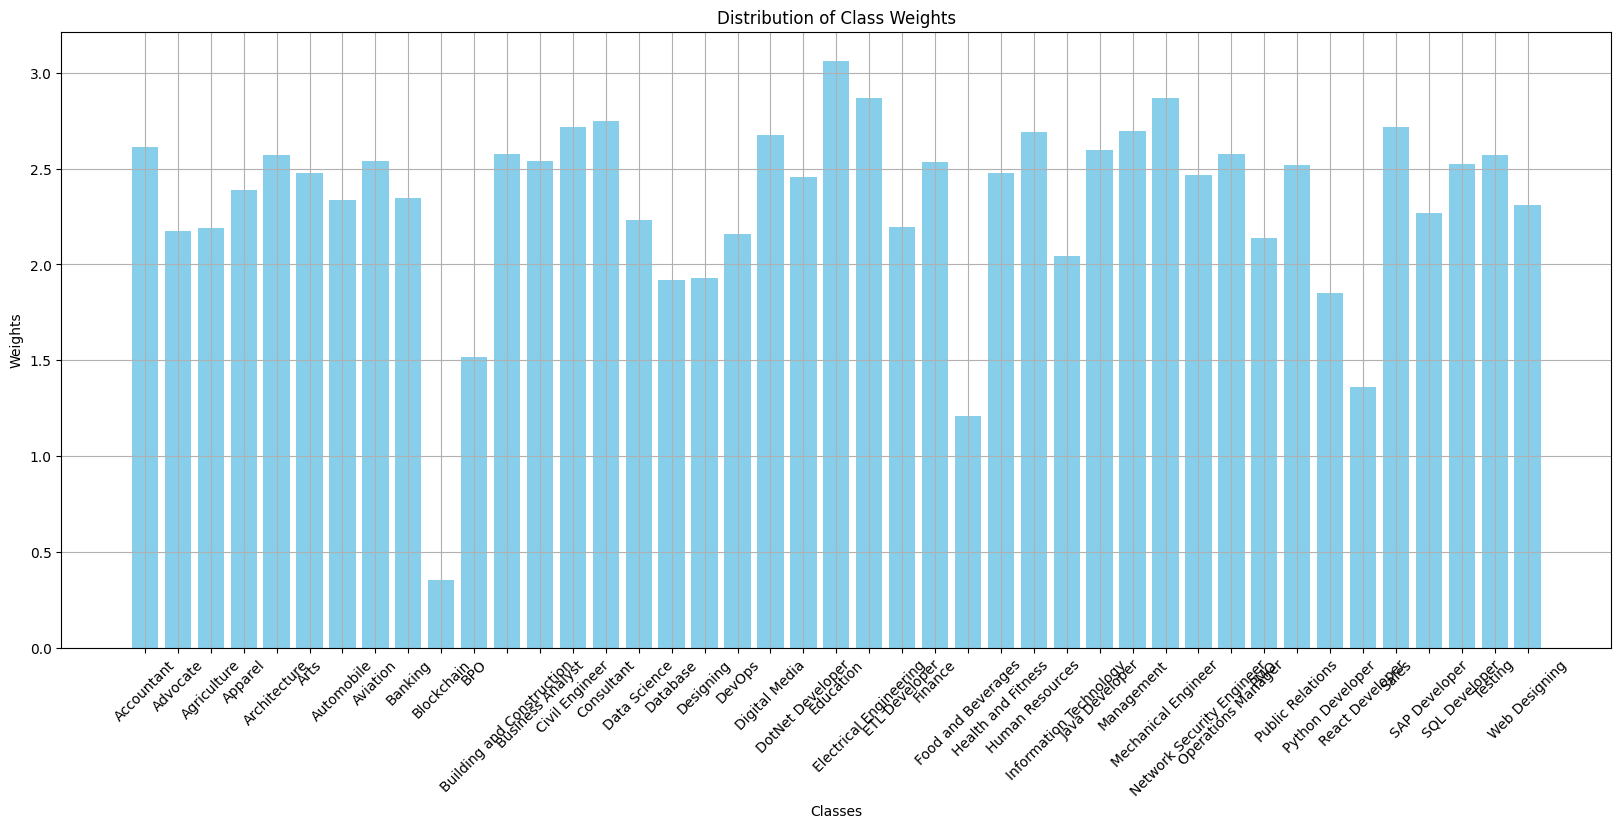

In [4]:
import seaborn as sns

def visualize_class_weights(class_weight_dict):
    import matplotlib.pyplot as plt
    classes = list(class_weight_dict.keys())
    weights = list(class_weight_dict.values())
    plt.figure(figsize=(20, 8))  # Adjusted figure size to accommodate all classes
    plt.bar(classes, weights, color='skyblue')
    plt.title('Distribution of Class Weights')
    plt.xlabel('Classes')
    plt.ylabel('Weights')
    plt.xticks(rotation=45)  # Rotated x-axis labels for better readability
    plt.grid(True)
    plt.show()

visualize_class_weights(initial_dist)

In [5]:
# data = prep_model_data(raw_data, handler)
fin_Data = data_preparing_func(preprocessor_func(), call_data())

Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: nnnnnnnbiotech
Problem word: nnnnnnn
Problem word: nnnnnnnn
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem word: novoresumecom
Found potentially problematic words:
Problem

In [7]:
fin_Data.keys()

dict_keys(['train_dataset', 'val_dataset', 'test_dataset', 'X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test', 'vocab_size', 'num_classes', 'embedding_matrix'])

In [8]:
class_weights = handler.calculate_class_weights(fin_Data["y_train"])
weights = [class_weights[label] for label in fin_Data['y_train']]

TypeError: unhashable type: 'numpy.ndarray'

In [7]:
batch_train = next(iter(fin_Data['train_dataset']))
batch_val = next(iter(fin_Data['val_dataset']))
print(f"Training Dataset Size: {batch_train[0].shape}, {batch_train[1].shape} \nTesting Dataset Size: {batch_val[0].shape}, {batch_val[1].shape}")

Training Dataset Size: (32, 500), (32,) 
Testing Dataset Size: (32, 500), (32,)


In [15]:
model_comp(fin_Data, preprocessor_func())

(<TextClassifier name=text_classifier_3, built=False>,
  <keras.src.callbacks.model_checkpoint.ModelCheckpoint at 0x20444fb7690>])

In [24]:
test = np.array(raw_data['Category']).reshape(-1, 1)

In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [36]:
OH = OneHotEncoder(sparse_output=True)
LE = LabelEncoder()

OH_Test = OH.fit_transform(test)
LE_Test = LE.fit_transform(raw_data['Category'])

In [40]:
len(OH.get_feature_names_out())

43

In [41]:
len(LE.classes_)

43

In [19]:
model, calls = model_comp(fin_Data, preprocessor_func())
train_model = train_step(handler, model, calls, fin_Data)

plot_accuracy(train_model, 'accuracy', 'val_accuracy')

Epoch 1/50


c:\Projs\COde\ResAnalysis\resanalysis\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 43)

In [27]:
Test_df = pd.DataFrame()

In [34]:
cats = np.unique(raw_data['Category'])
cats

array(['Accountant', 'Advocate', 'Agriculture', 'Apparel', 'Architecture',
       'Arts', 'Automobile', 'Aviation', 'BPO', 'Banking', 'Blockchain',
       'Building and Construction', 'Business Analyst', 'Civil Engineer',
       'Consultant', 'Data Science', 'Database', 'Designing', 'DevOps',
       'Digital Media', 'DotNet Developer', 'ETL Developer', 'Education',
       'Electrical Engineering', 'Finance', 'Food and Beverages',
       'Health and Fitness', 'Human Resources', 'Information Technology',
       'Java Developer', 'Management', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Public Relations', 'Python Developer', 'React Developer',
       'SAP Developer', 'SQL Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

In [41]:
import pandas as pd

def filter_one_row_per_category(df, category_column):
    """
    Filters a DataFrame to keep only one row for each unique value
    in a specified category column.

    Args:
        df: The input DataFrame.
        category_column: The name of the column containing the categories.

    Returns:
        A new DataFrame with one row per category, or the original
        DataFrame if the category column is not found or if there's
        an issue during grouping.  Returns an empty DataFrame if
        the input DataFrame is empty.
    """

    if df.empty:
        return df  # Return empty DataFrame if input is empty

    if category_column not in df.columns:
        print(f"Error: Category column '{category_column}' not found.")
        return df  # Return original DataFrame if column not found

    try:
        filtered_df = df.groupby(category_column).head(1).reset_index(drop=True)
        return filtered_df
    except Exception as e:
        print(f"An error occurred during filtering: {e}")
        return df # Return original DataFrame in case of errors

# Filter the DataFrame
filtered_df = filter_one_row_per_category(raw_data, 'Category')
filtered_df

,Category,Resume,cleaned_text
0,Accountant,education omba executive leadership university...,omba executive leadership university texas bac...
1,Advocate,shivani singh criminal lawyer 9782522876 shiva...,shivani singh criminal lawyer phone shivanisin...
2,Agriculture,summary gianna daniels 1 main street new cityl...,gianna daniel main street cityland cell exampl...
3,Apparel,profile fashion blogger enjoys keeping date le...,profile fashion blogger enjoys keeping date le...
4,Architecture,personal info 2136989195 darcieabimolagmailcom...,personal info phone darcieabimolagmailcom wwwa...
5,Arts,height 58 new york theatre girl called vincent...,height york theatre girl called vincent cuff c...
6,Automobile,aimee green 1 main street new cityland ca 9101...,aimee green main street cityland exampleemaile...
7,Aviation,current residence 5555 kingman blvd las vegas ...,current residence kingman blvd la vega jeffrey...
8,Banking,jesse kendall 123 elm street eugene 97404 5415...,jesse kendall elm street eugene phone jkendall...
9,Blockchain,ukrainian development western management middl...,ukrainian development western management middl...
